In [2]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi
from mpl_toolkits.mplot3d import Axes3D
import gym
import seagul.envs

import torch

%matplotlib inline

In [3]:
def zeros(t,q):
    return 0,0,0

control = zeros

# Standard Lorenz Equations but with a control input
def lorenz(t, q, b = 8/3, s = 10, r = 15):
    x = q[0]; y = q[1]; z = q[2]
    ux, uy, uz = control(t,q)
    
    xdot = s*(y-x) - ux
    ydot = r*x - y - x*z - uy
    zdot = x*y - b*z - uz
    
    
    return xdot,ydot,zdot

In [4]:
n = 50000 # total number of points
tmax = 1000
tspan = [0,tmax]
t_eval = np.linspace(0, tmax, n)
init_state = np.array([3,1,10]) 

sol = solve_ivp(lorenz, tspan, init_state, t_eval = t_eval)
x,y,z = sol.y

Text(0.5, 0.92, 'phase diagram, No control')

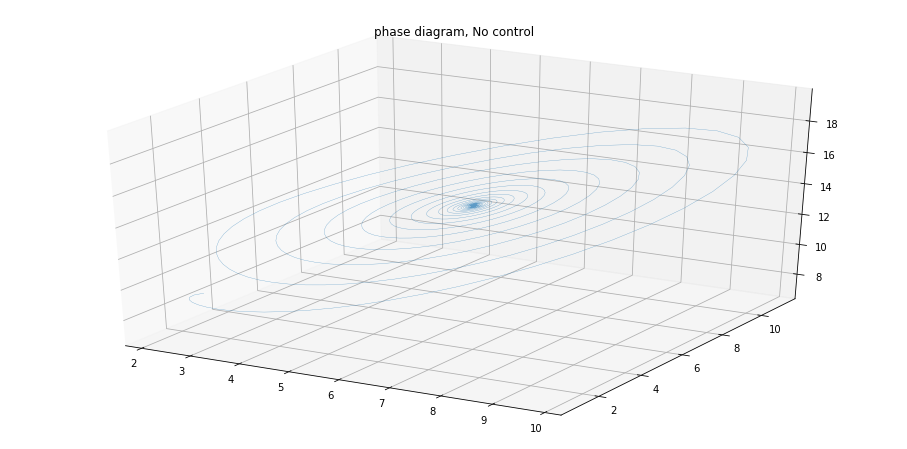

In [5]:
fig = plt.figure(figsize=(16,8))
ax = fig.gca(projection='3d')
ax.plot(x,y,z, alpha=0.7, linewidth=.3)
ax.set_title('phase diagram, No control')


# Remove all the axis clutter, leaving just the curve.

Text(0.5, 1.0, 'y-z phase plane')

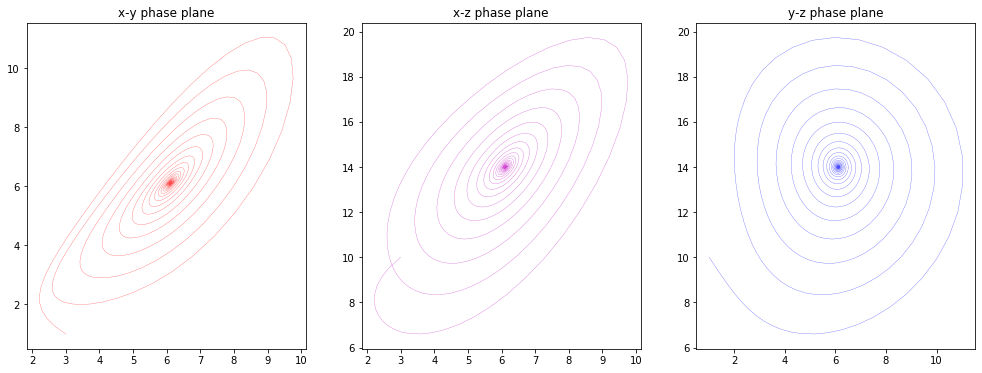

In [6]:
# Taken from https://github.com/gboeing/lorenz-system/blob/master/lorenz-system-attractor-visualize.ipynb

# TODO make this into a function
# now plot two-dimensional cuts of the three-dimensional phase space
fig, ax = plt.subplots(1, 3, sharex=False, sharey=False, figsize=(17, 6))

# plot the x values vs the y values
ax[0].plot(x, y, color='r', alpha=0.7, linewidth=0.3)
ax[0].set_title('x-y phase plane')

# plot the x values vs the z values
ax[1].plot(x, z, color='m', alpha=0.7, linewidth=0.3)
ax[1].set_title('x-z phase plane')

# plot the y values vs the z values
ax[2].plot(y, z, color='b', alpha=0.7, linewidth=0.3)
ax[2].set_title('y-z phase plane')


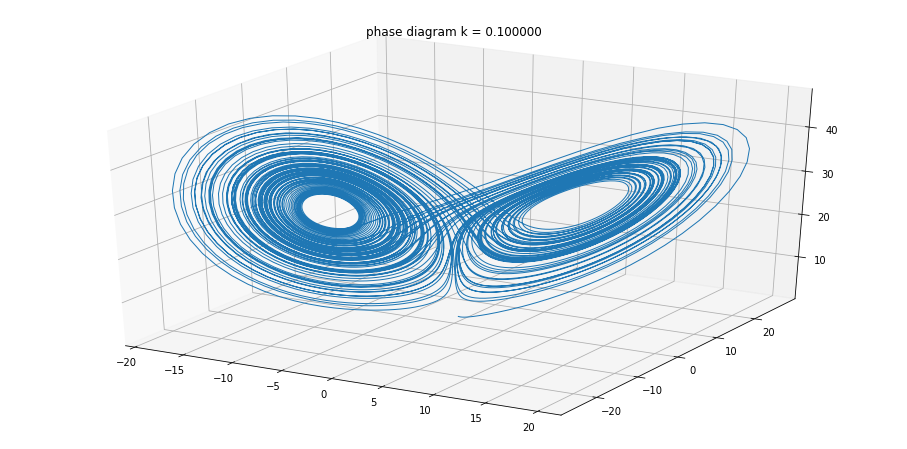

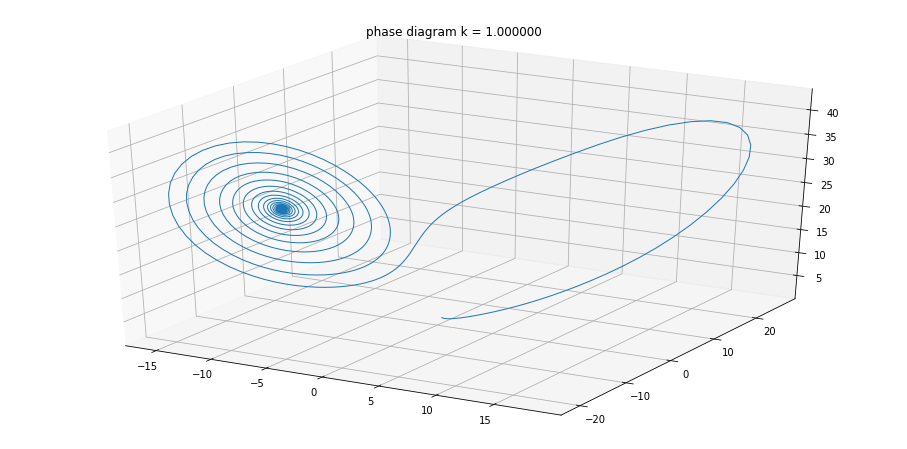

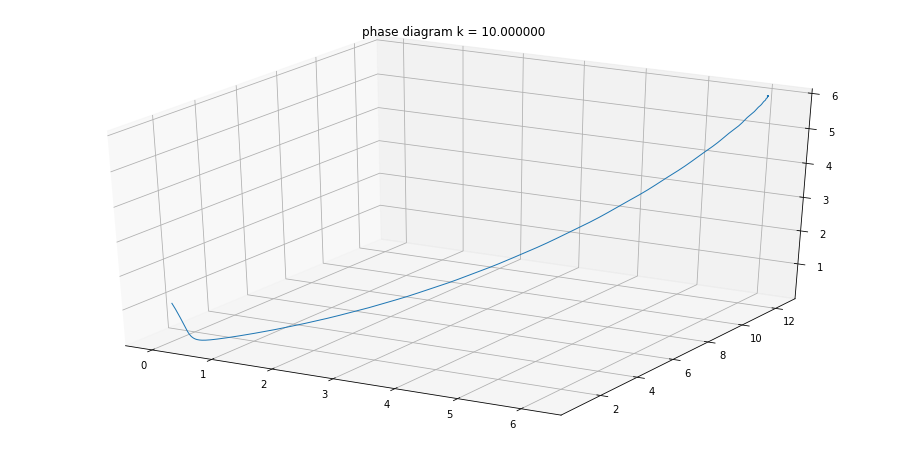

In [49]:
# Drive everything to the origin

def origin_kp(t,q,k=1):
    return q[0]*k,q[1]*k,q[2]*k


k_vals = [.1,1,10]

x = np.zeros((n,len(k_vals)))
y = np.zeros((n,len(k_vals)))
z = np.zeros((n,len(k_vals)))

for i,k in enumerate(k_vals):
    control = lambda t,q : origin_kp(t,q,k=k)
    sol = solve_ivp(lorenz, tspan, init_state, t_eval = t_eval)
    x[:,i] = sol.y[0,:]
    y[:,i] = sol.y[1,:]
    z[:,i] = sol.y[2,:]
    
    
    fig = plt.figure(figsize=(16,8))
    ax = fig.gca(projection='3d')
    ax.plot(x[:,i],y[:,i],z[:,i], alpha=1, linewidth=1)
    ax.set_title('phase diagram k = %f' %k)
    
    

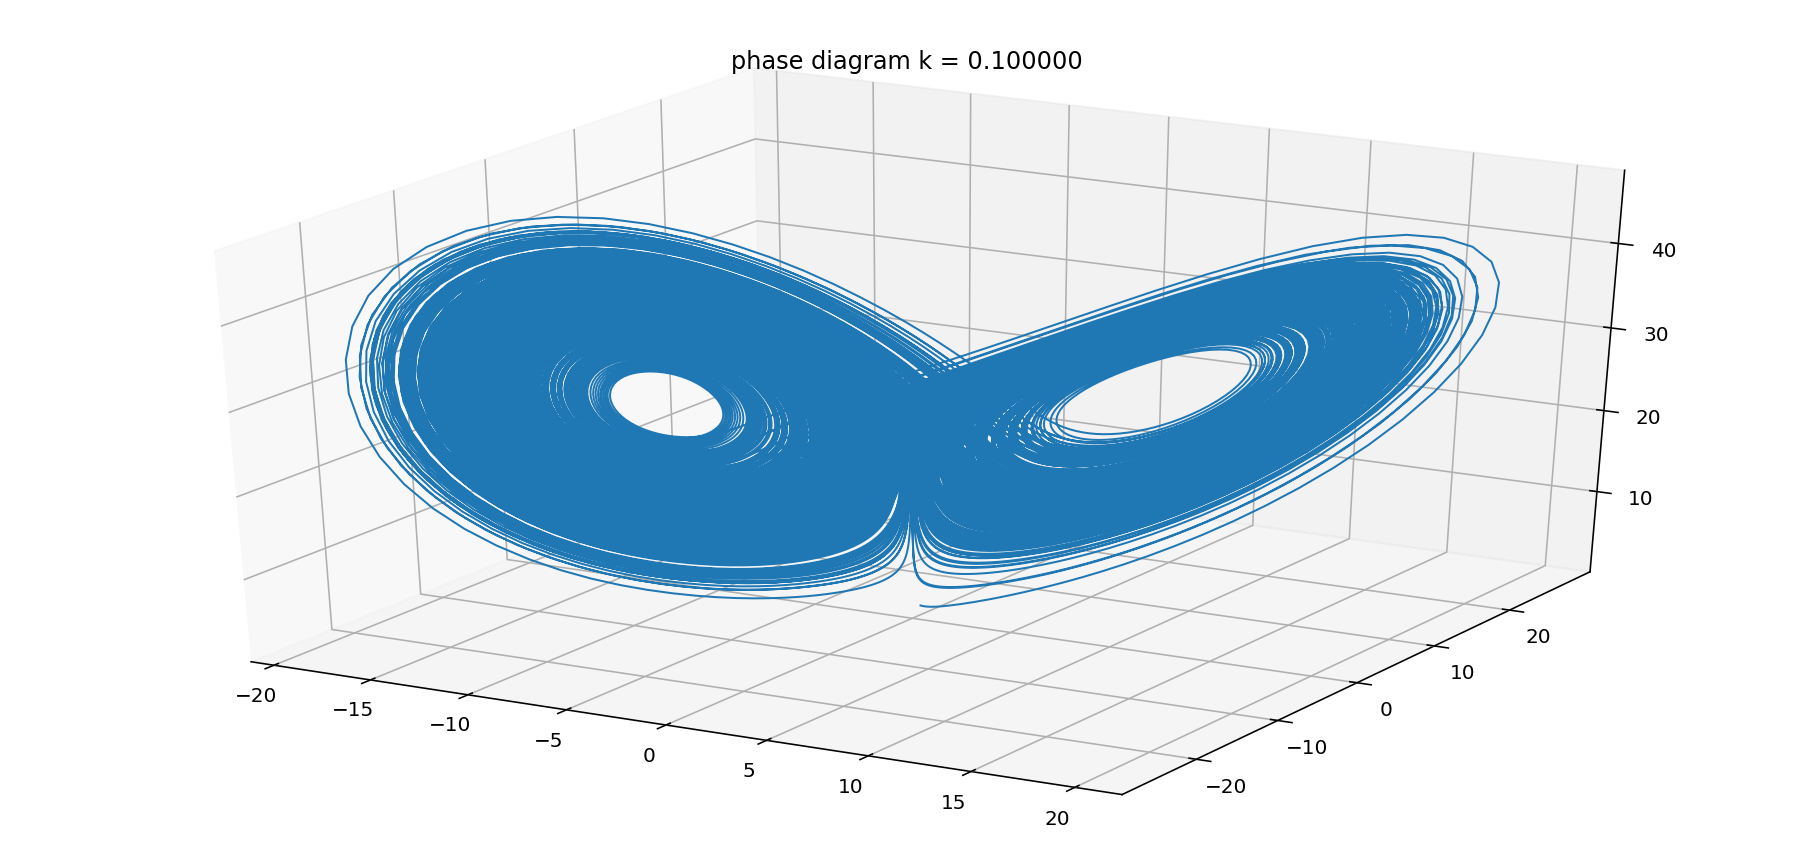

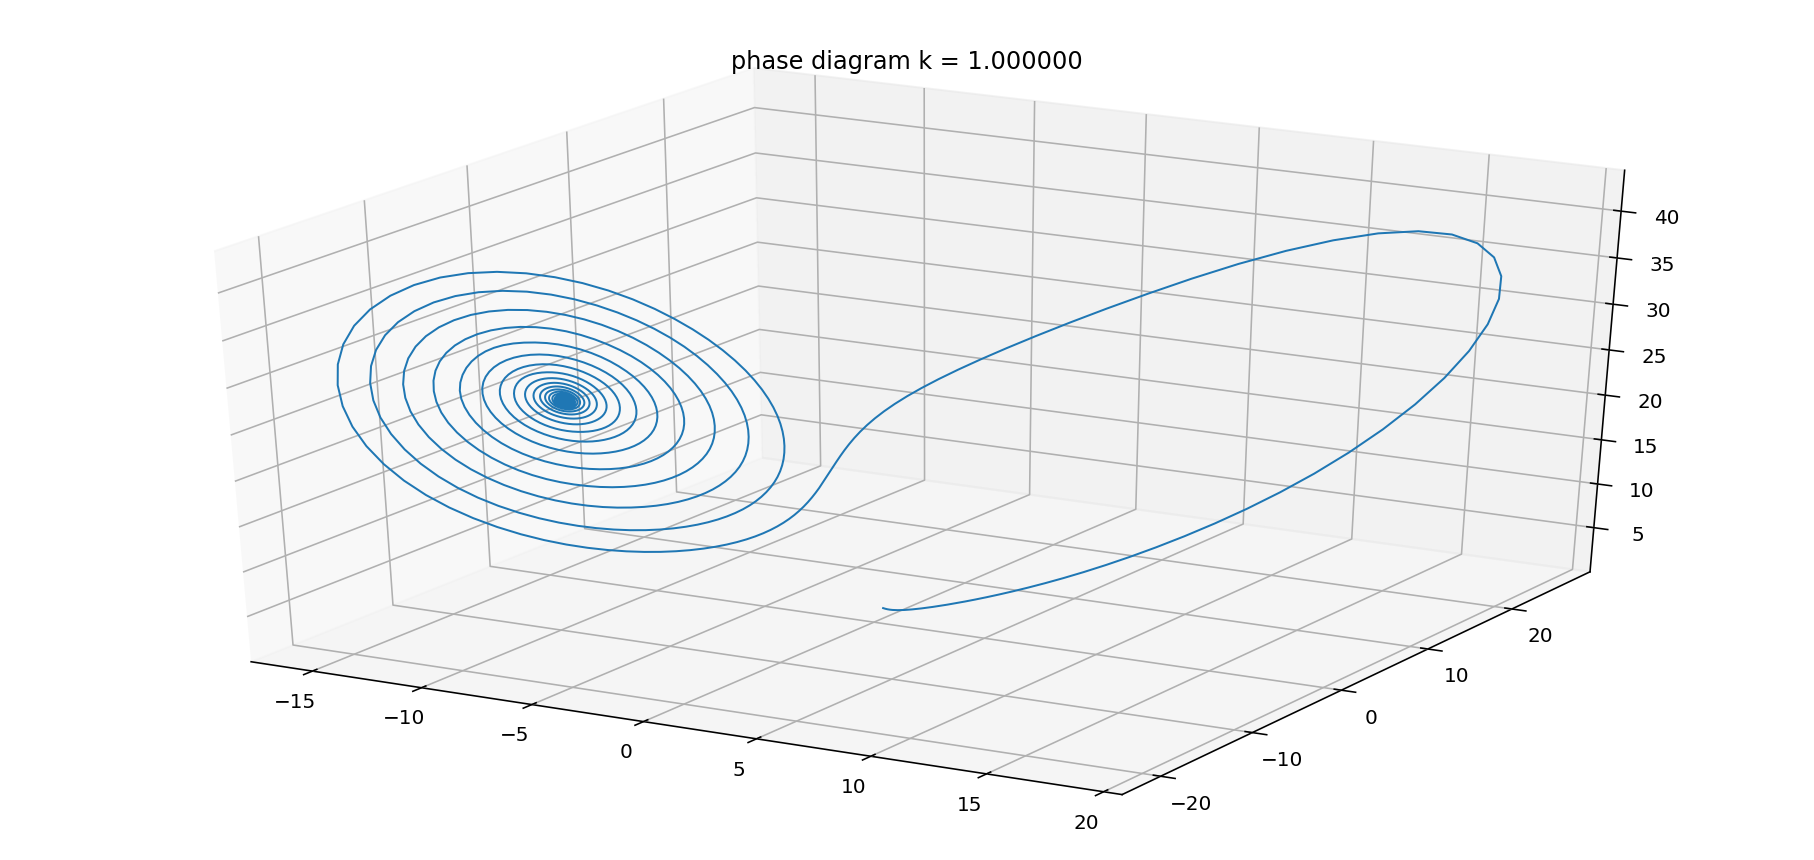

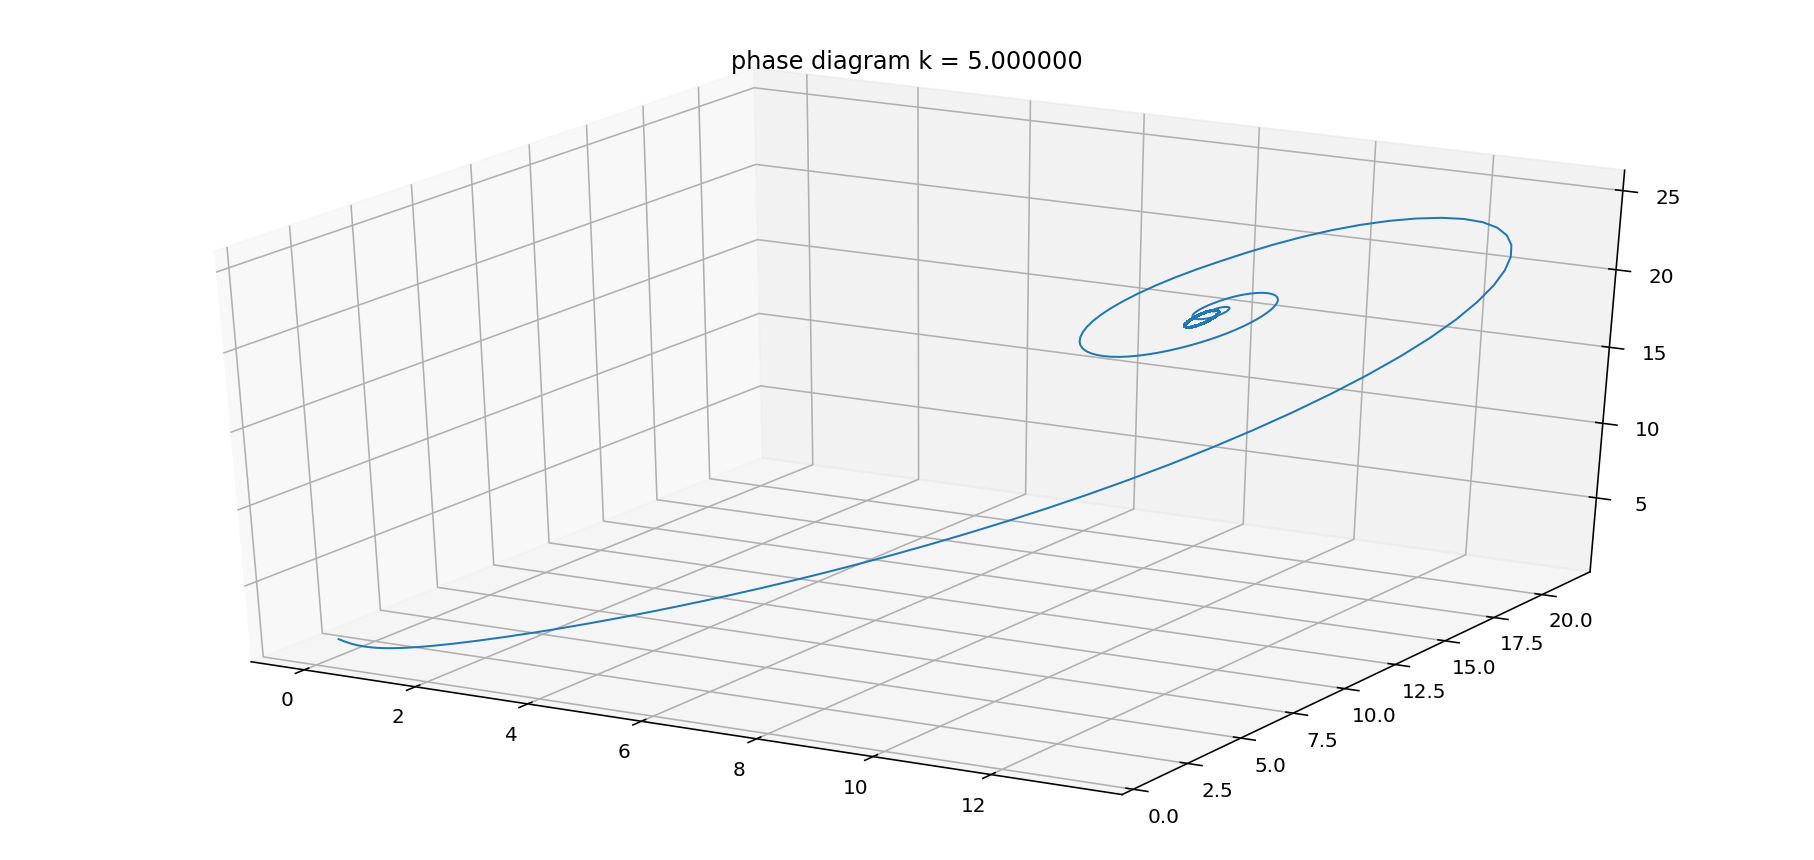

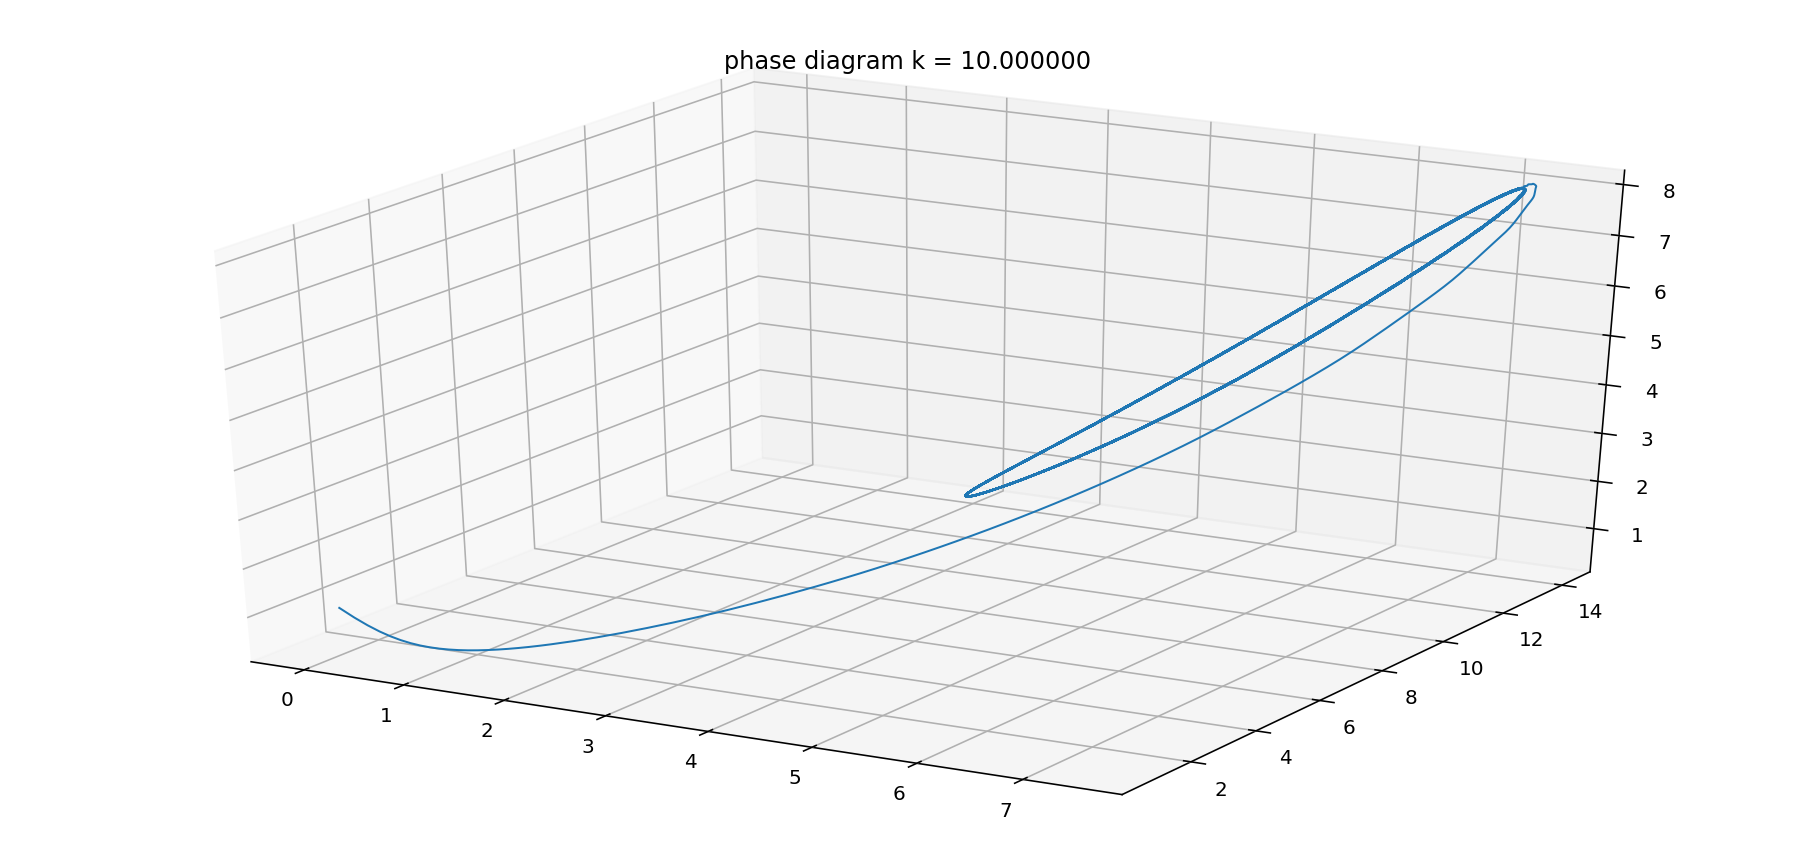

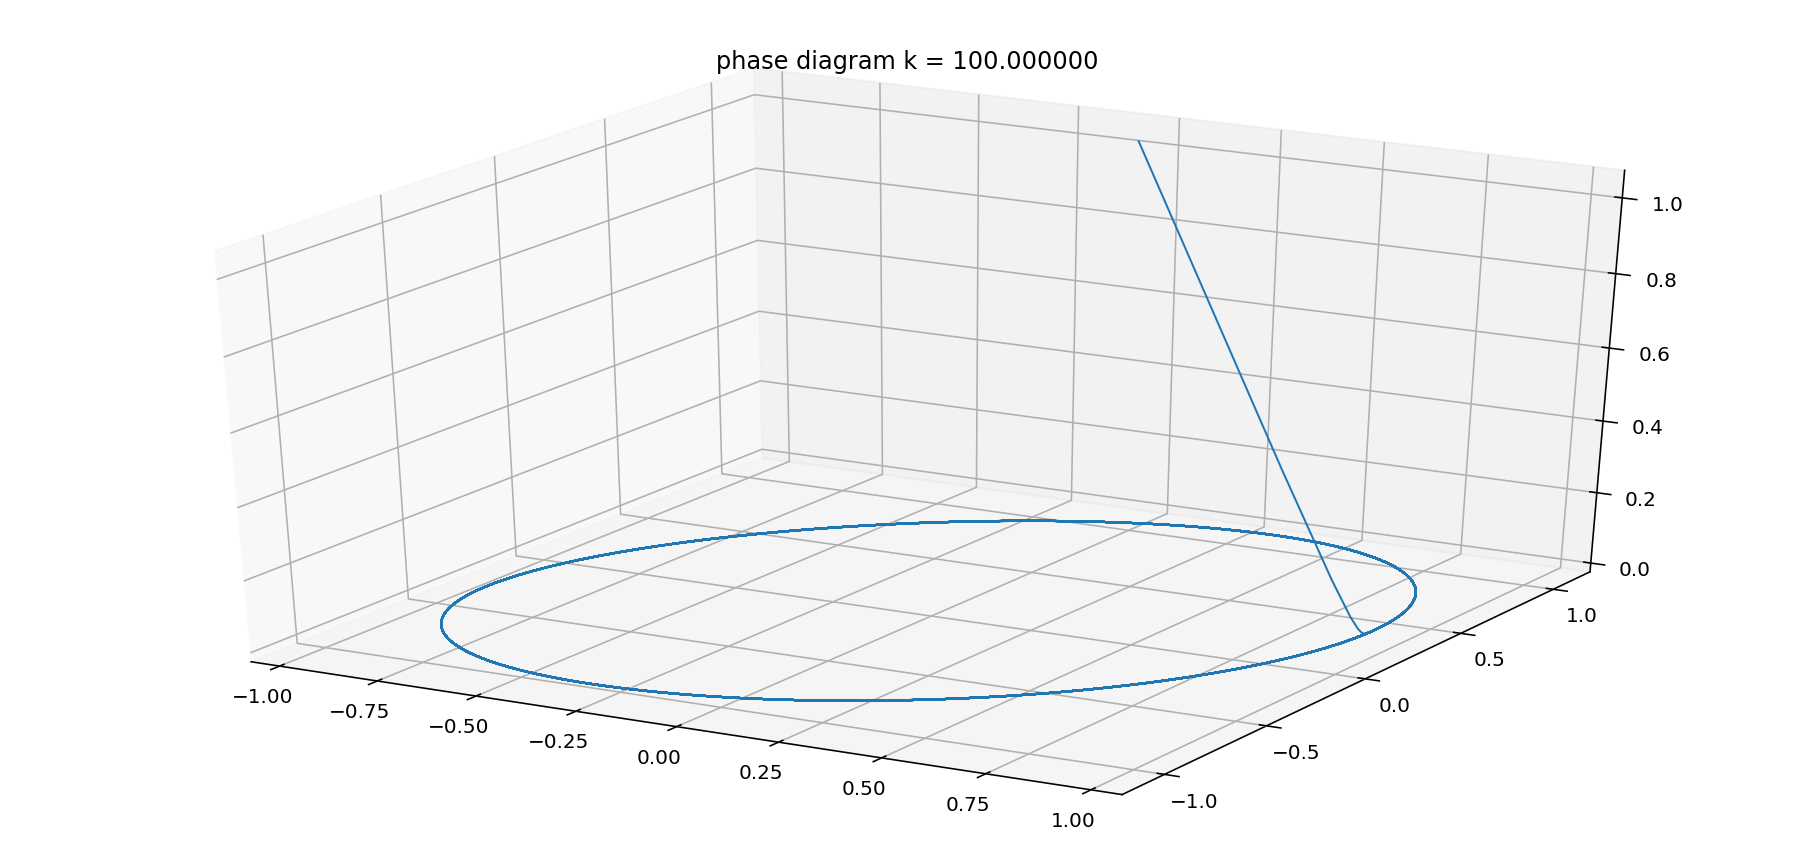

In [67]:
t = np.linspace(0,tmax,n)
w = 2*pi/10 # 10HZ
x_traj = lambda t,y : np.cos(w*t)
y_traj = lambda t,y : np.sin(w*t)
z_traj = lambda t,y : 0


def circle_traj(t,q,k=1):
    return (q[0] - x_traj(t,y))*k , (q[1] - y_traj(t,y))*k, (q[2] - z_traj(t,y))*k

control = circle_traj

k_vals = [.1,1,5,10,100]

x = np.zeros((n,len(k_vals)))
y = np.zeros((n,len(k_vals)))
z = np.zeros((n,len(k_vals)))

for i,k in enumerate(k_vals):
    control = lambda t,q : circle_traj(t,q,k=k)
    sol = solve_ivp(lorenz, tspan, init_state, t_eval = t_eval)
    x[:,i] = sol.y[0,:]
    y[:,i] = sol.y[1,:]
    z[:,i] = sol.y[2,:]
    
    
    fig = plt.figure(figsize=(16,8))
    ax = fig.gca(projection='3d')
    ax.plot(x[:,i],y[:,i],z[:,i], alpha=1 , linewidth=1)
    ax.set_title('phase diagram k = %f' %k)
    

In [ ]:
# Mess with these when you're tired of slow code

import numba as nb
from numba import jit

@nb.jit((nb.f8, nb.f8[:]), (nb.f8, nb.f8, nb.f8), nopython=True)
def control_jit(t,q):
    return 0,0,0

@nb.jit(nb.f8[:], (nb.f8, nb.f8, nb.f8), nopython=True)
def lorenz_jit(t, q, b = 8/3, s = 10, r = 28):
    x = q[0]; y = q[1]; z = q[2]
    ux, uy, uz = control_jit(t,q)
    
    xdot = s*(y-x) - ux
    ydot = r*x - y - x*z - uy
    zdot = x*y - b*z - uz
    
    
    return xdot,ydot,zdot